# **Name: Abdelrahman Ahmed Khamis Abdelmoteleb**
# **Milestone: 3**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv('/content/cleaned_data_telecomchurn.csv')

In [3]:
data

,Unnamed: 0,telecom_partner,gender,age,age_decay_range,age_interval,state,city,region,registration_year,...,num_dependents,single or not,estimated_salary,calls_made,calls_made_negative,sms_sent,sms_sent_negative,data_used,data_used_negative,churn
0,0,Reliance Jio,F,25,20,Young Adults,Karnataka,Kolkata,South India,2020,...,4,Not single,124962,44,0,45,0,361,1,0
1,1,Reliance Jio,F,55,50,Old Adults,Mizoram,Mumbai,Northeast India,2020,...,2,Not single,130556,62,0,39,0,5973,0,0
2,2,Vodafone,F,57,50,Old Adults,Arunachal Pradesh,Delhi,Northeast India,2020,...,0,Single,148828,49,0,24,0,193,0,1
3,3,BSNL,M,46,40,Old Adults,Tamil Nadu,Kolkata,South India,2020,...,1,Not single,38722,80,0,25,0,9377,0,1
4,4,BSNL,F,26,20,Old Adults,Tripura,Delhi,Northeast India,2020,...,2,Not single,55098,78,0,15,0,1393,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243548,Airtel,F,28,20,Old Adults,Mizoram,Kolkata,Northeast India,2023,...,3,Not single,130580,28,0,9,0,4102,0,0
243549,243549,Reliance Jio,F,52,50,Old Adults,Assam,Kolkata,Northeast India,2023,...,0,Single,82393,80,0,45,0,7521,0,0
243550,243550,Reliance Jio,M,59,50,Old Adults,Tripura,Kolkata,Northeast India,2023,...,4,Not single,51298,26,0,4,0,6547,0,0
243551,243551,BSNL,M,49,40,Old Adults,Madhya Pradesh,Kolkata,Central India,2023,...,2,Not single,83981,80,0,15,0,1125,0,0


telecom_partner        0
gender                 0
age                    0
age_decay_range        0
age_interval           0
state                  0
city                   0
region                 0
registration_year      0
registration_month     0
registration_day       0
num_dependents         0
single or not          0
estimated_salary       0
calls_made             0
calls_made_negative    0
sms_sent               0
sms_sent_negative      0
data_used              0
data_used_negative     0
churn                  0
dtype: int64
False
False
False
False
False
False
False
False
telecom_partner        object
gender                 object
age                     int64
age_decay_range         int64
age_interval           object
state                  object
city                   object
region                 object
registration_year       int64
registration_month      int64
registration_day        int64
num_dependents          int64
single or not          object
estimated_salary        

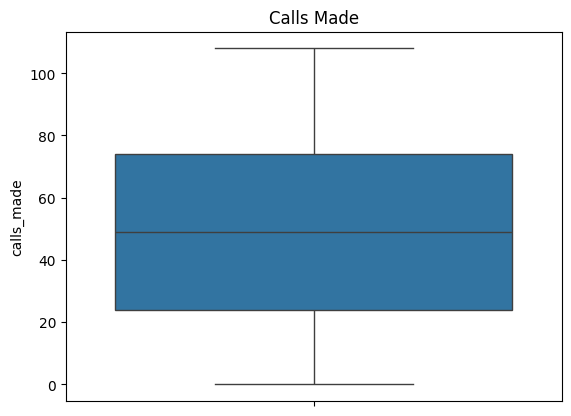

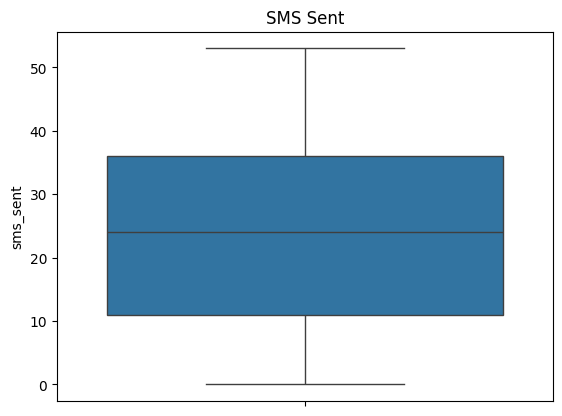

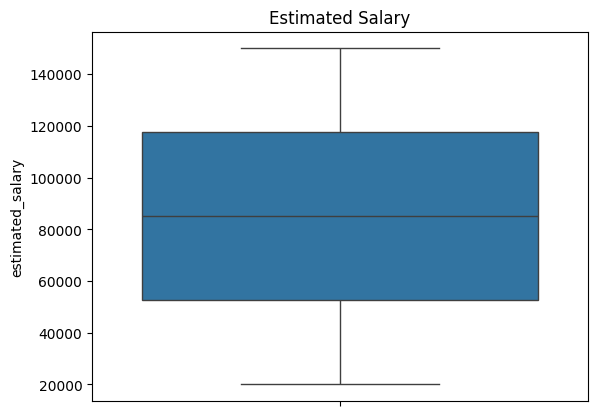

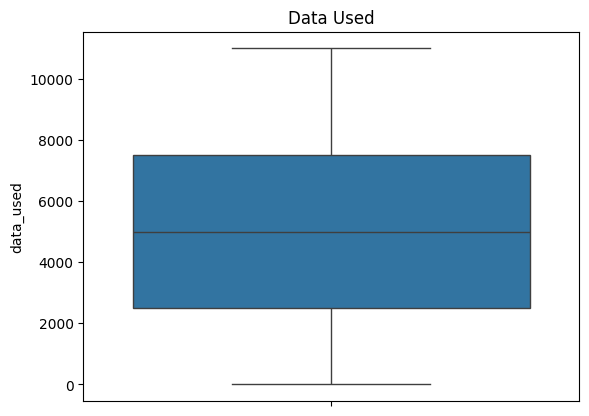

Index(['telecom_partner', 'gender', 'age', 'age_decay_range', 'age_interval',
       'state', 'city', 'region', 'registration_year', 'registration_month',
       'registration_day', 'num_dependents', 'single or not',
       'estimated_salary', 'calls_made', 'calls_made_negative', 'sms_sent',
       'sms_sent_negative', 'data_used', 'data_used_negative', 'churn',
       'estimated_salary_standardized', 'calls_made_standardized',
       'sms_sent_standardized', 'data_used_standardized',
       'estimated_salary_normalized', 'calls_made_normalized',
       'sms_sent_normalized', 'data_used_normalized', 'calls_made_log',
       'sms_sent_log', 'estimated_salary_log', 'data_used_log'],
      dtype='object')
  telecom_partner gender  age  age_decay_range  age_interval  \
0    Reliance Jio      F   25               20  Young Adults   
1    Reliance Jio      F   55               50    Old Adults   
2        Vodafone      F   57               50    Old Adults   
3            BSNL      M   46   

In [4]:


# Drop unnecessary column
data = data.drop(columns=["Unnamed: 0"])

# ====== Check for missing values ======
print(data.isnull().sum())

# ====== Check for negative values ======
print((data['estimated_salary'] < 0).any())
print((data['calls_made'] < 0).any())
print((data['sms_sent'] < 0).any())
print((data['data_used'] < 0).any())

# ====== Handle negative values ======
data['estimated_salary'] = data['estimated_salary'].abs()
data['calls_made'] = data['calls_made'].abs()
data['sms_sent'] = data['sms_sent'].abs()
data['data_used'] = data['data_used'].abs()

# Re-check for negatives
print((data['estimated_salary'] < 0).any())
print((data['calls_made'] < 0).any())
print((data['sms_sent'] < 0).any())
print((data['data_used'] < 0).any())

# ====== Check data types ======
print(data.dtypes)

# ====== Scaling and Normalization ======
targeted_columns = ['estimated_salary', 'calls_made', 'sms_sent', 'data_used']

# Standardization
scaled_stand_columns = StandardScaler().fit_transform(data[targeted_columns])
scaled_read_tc_standard = pd.DataFrame(scaled_stand_columns, columns=[col + '_standardized' for col in targeted_columns])
data = pd.concat([data, scaled_read_tc_standard], axis=1)

# Normalization
normalized_columns = MinMaxScaler().fit_transform(data[targeted_columns])
scaled_read_tc_minmax = pd.DataFrame(normalized_columns, columns=[col + '_normalized' for col in targeted_columns])
data = pd.concat([data, scaled_read_tc_minmax], axis=1)

# ====== Handle Outliers ======
# Boxplots
sns.boxplot(data=data['calls_made'])
plt.title("Calls Made")
plt.show()

sns.boxplot(data=data['sms_sent'])
plt.title("SMS Sent")
plt.show()

sns.boxplot(data=data['estimated_salary'])
plt.title("Estimated Salary")
plt.show()

sns.boxplot(data=data['data_used'])
plt.title("Data Used")
plt.show()

# ====== Logarithmic Transformation ======
epsilon = 1e-5  # To avoid log(0)

data['calls_made_log'] = np.log(data['calls_made'] + epsilon)
data['sms_sent_log'] = np.log(data['sms_sent'] + epsilon)
data['estimated_salary_log'] = np.log(data['estimated_salary'] + epsilon)
data['data_used_log'] = np.log(data['data_used'] + epsilon)

# Show result
print(data.columns)
print(data.head())


In [5]:
data_scaled = data.copy()


In [6]:
#Encode 'single or not': Single = 1, Not single = 0
data_scaled['single_or_not_encoded'] = data_scaled['single or not'].map({'Single': 1, 'Not single': 0})

In [7]:
data_scaled[['single or not']].value_counts()

,count
single or not,
Not single,194626
Single,48927


In [8]:
data_scaled[['single or not', 'single_or_not_encoded']].head()

,single or not,single_or_not_encoded
0,Not single,0
1,Not single,0
2,Single,1
3,Not single,0
4,Not single,0


In [9]:
registration_data = data[['registration_year', 'registration_month', 'registration_day']].rename(
    columns={
        'registration_year': 'year',
        'registration_month': 'month',
        'registration_day': 'day'
    }
)
data['registration_date'] = pd.to_datetime(registration_data[['year', 'month', 'day']])

In [10]:
# 2. Extract useful features from registration_date
data['registration_dayofweek'] = data['registration_date'].dt.dayofweek  # Monday=0, Sunday=6
data['registration_dayofyear'] = data['registration_date'].dt.dayofyear
data['days_since_registration'] = (pd.to_datetime("today") - data['registration_date']).dt.days

In [11]:
# 3. Choose numeric columns for standardization (excluding ID columns and target)
numeric_cols = ['registration_dayofweek', 'registration_dayofyear', 'days_since_registration']

In [12]:
# Apply Standardization
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [13]:
# Show the transformed features
data_scaled[numeric_cols + ['churn']].head()

,registration_dayofweek,registration_dayofyear,days_since_registration,churn
0,-0.499736,-1.587525,1.730623,0
1,-0.499736,-1.587525,1.730623,0
2,-0.499736,-1.587525,1.730623,1
3,-0.499736,-1.587525,1.730623,1
4,-0.499736,-1.587525,1.730623,0


In [ ]:
# Select only numeric columns (exclude any leftover strings)
X = data.drop(columns=["churn"])
X = X.select_dtypes(include=["number"])  # Keep only numeric columns
y = data["churn"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
